### DAT-540 Project 7 Group 13 by Marius, Marianne, Olufisayo, Dipanjan and Pascal

## Introduction
Generating power from solar energy relies on the weather conditions at the power generation plant, this project aims to use the data gotten from two solar power generations plants to predict future power generation using machine learning models, the plant's data for each plant is split into two parts the weather data and energy production data. This data will be analysed, cleaned, and visualized before running it through the machine learning models. The plant will also be analysed for faulty equipment and bad data. The accuracy of the machine learning models will also be tested using the mean squared error and the best model will be recommended. 

| **DATE_TIME**                      | **PLANT_ID**          | **SOURCE_KEY**                                                                                    | DC_POWER                           | AC_POWER                                | DAILY_YIELD                         | TOTAL_YIELD                                    |
|------------------------------------|-----------------------|---------------------------------------------------------------------------------------------------|------------------------------------|-----------------------------------------|-------------------------------------|------------------------------------------------|
| Date given in date hour and minute | Describes which plant | Inverter meaning the one that reads the data for the generator and the sensor for the weatherdata | Amount of direct current generated | Amount of alternating current generated | Daily production of generated power | Total production generated across the dataset. |

For the weather data we have:

| **DATE_TIME**                      | **PLANT_ID**          | **SOURCE_ID**                   | AMBIENT_TEMPERATURE                              | MODULE_TEMPERATURE                                                                                      | IRRIDATION             |
|------------------------------------|-----------------------|---------------------------------|--------------------------------------------------|---------------------------------------------------------------------------------------------------------|------------------------|
| Date given in date hour and minute | Describes which plant | The sensor for the weather data | The temperature in which the equipment is stored | The average temperature across the sensors, which in a laboratory setting should be 25 degrees celsius. | High energy radiation. |

The data has been collected over a 34-day period from two solar power plants in India in optimal conditions for the sensors, the equipment could still get faulty over time and we will be exploring what faulty data looks like by looking at the deviation in parameters such as module temperature.

## Contributions

#### Marius Skårdal 


Responsibilities include:

- Group leader 

- Wrote the introduction

- Helped out with preprocessing 

- Analysed the correlation

- Did the linear regression model 

- Did the error estimation

- Did the AR(1) model 

- Did the plots for the linear regression, cosine and AR(1) model

- Responsible for the arrangements made

- Responsible for revising the project and finalizing it

- References

#### Marianne Udtian

Responsibilites include:

- Preprocessing data

- Explaining the data

- Visualizing the data

- Searching for missing data

- Histograms

- Plotting the faults with DC power and scaling the data

- Ambient temperature analysis

- Investigated the efficiencies of AC and DC power

- Training and testing the outputs of DC power

#### Olufisayo Togun

Responsibilities include:

- Helped write the introduction

- Analysing and cleaning the data(data formating, cleaning and merging)

- Analysis of the equipment in both plants

- Visualization of the data

- Worked on the Cosine model for the data prediction

- Code debugging

- Wrote the conclusion 

- Creation of the power point and recorded video


#### Dipanjan Banik

Responsibilites include:

- Data visualisation

- Research 

- Forecasting

- ARIMA

- Powerpoint

- Video presentation 

#### Pascal Abuchi

Responsibilites include:

- Helping with data cleaning

- Debugging various parts of code 

- Creating the powerpoint 

- Helped evaluate models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno 
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
from functools import reduce
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score
from pmdarima.arima import auto_arima, ADFTest

# Read data
### Drop unnecessary data

In [2]:
Plant_1=pd.read_csv('Plant_1_Generation_Data.csv')
Plant_2=pd.read_csv('Plant_2_Generation_Data.csv')
Weat_1=pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
Weat_2=pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
#Drop unnecessary column
Plant_1=Plant_1.drop(['PLANT_ID'],axis=1,)
Plant_2=Plant_2.drop(['PLANT_ID',],axis=1,)
Weat_1=Weat_1.drop(['PLANT_ID','SOURCE_KEY'],axis=1)
Weat_2=Weat_2.drop(['PLANT_ID','SOURCE_KEY'],axis=1)
#Adjust date time
Weat_1['DATE_TIME'] =  pd.to_datetime(Weat_1['DATE_TIME'], format='%Y-%m-%d')
Plant_2['DATE_TIME']= pd.to_datetime(Plant_2['DATE_TIME'],format='%Y-%m-%d %H:%M') 
Weat_2['DATE_TIME'] =  pd.to_datetime(Weat_2['DATE_TIME'], format='%Y-%m-%d')




The daily yeild and the total yeild for plant 2 is wrong so we recalculated them

In [3]:
Plant_1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,17-06-2020 23:45,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [4]:
Plant_2

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [5]:
time_2=Plant_2['DATE_TIME'].dt.date
Plant_2["DAILY_YIELD"] = Plant_2["AC_POWER"].groupby(time_2).cumsum()
Plant_2["TOTAL_YIELD"] = Plant_2.DAILY_YIELD.cumsum() 

In [6]:
Plant_1.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,3147.426211,307.802752,3295.968737,6.978712e+06
std,4036.457169,394.396439,3145.178309,4.162720e+05
min,0.000000,0.000000,0.000000,6.183645e+06
25%,0.000000,0.000000,0.000000,6.512003e+06
50%,429.000000,41.493750,2658.714286,7.146685e+06
75%,6366.964286,623.618750,6274.000000,7.268706e+06
max,14471.125000,1410.950000,9163.000000,7.846821e+06


In [7]:
#Run description of the data
Plant_2.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,246.701961,241.277825,235076.430317,8.172576e+09
std,370.569597,362.112118,211775.149769,4.605303e+09
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,2.403571,4.169363e+09
50%,0.000000,0.000000,222828.450952,8.391143e+09
75%,446.591667,438.215000,435466.164762,1.250671e+10
max,1420.933333,1385.420000,651437.736667,1.591420e+10


Note how the difference becomes significant from 75% and up to max. Since both AC and DC triple from 75% to max, some of the values we are dealing with may be extreme values, ranging outside of our data. 

In [8]:
Weat_1.describe()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.000000,3182.000000,3182.000000
mean,25.531606,31.091015,0.228313
std,3.354856,12.261222,0.300836
min,20.398505,18.140415,0.000000
25%,22.705182,21.090553,0.000000
50%,24.613814,24.618060,0.024653
75%,27.920532,41.307840,0.449588
max,35.252486,65.545714,1.221652


In [9]:
Weat_2.describe()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.000000,3259.000000,3259.000000
mean,28.069400,32.772408,0.232737
std,4.061556,11.344034,0.312693
min,20.942385,20.265123,0.000000
25%,24.602135,23.716881,0.000000
50%,26.981263,27.534606,0.019040
75%,31.056757,40.480653,0.438717
max,39.181638,66.635953,1.098766


Irradiation is power/area in the form of electromagnetic radiation from the sun.\
Max Ambient temperature for plant 1 is 35.25, and 39.18 for plant 2. \
Min is 20.4 for plant 1 and 20.94 for plant 2. 

In [10]:
print(Plant_2.DAILY_YIELD.drop_duplicates(inplace = True)) #Checking for duplicate values

None


## Checking for Faulty Equipment

In [11]:
Plant_1["TOT_EQ_YIELD"] = Plant_1["AC_POWER"].groupby(Plant_1['SOURCE_KEY']).cumsum()
new_df = Plant_1[["TOT_EQ_YIELD",'SOURCE_KEY']].copy()
Plant_1.drop(["TOT_EQ_YIELD"],axis=1,)
d=new_df.sort_values(by="TOT_EQ_YIELD",ascending=True)
le=new_df["SOURCE_KEY"].unique()


Equip=d.sort_values(by='TOT_EQ_YIELD',ascending=False).drop_duplicates('SOURCE_KEY')
print(Equip.describe())
Plant_1=Plant_1.drop(["TOT_EQ_YIELD"],axis=1,)
Plant_1


        TOT_EQ_YIELD
count      22.000000
mean   962275.349787
std     28982.277820
min    873237.550835
25%    960034.517139
50%    967057.624822
75%    977405.362023
max    997125.156663


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,17-06-2020 23:45,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


checking for faulty equipment for plant 2


In [12]:
Plant_2["TOT_EQ_YIELD"] = Plant_2["AC_POWER"].groupby(Plant_2['SOURCE_KEY']).cumsum()
new_df = Plant_2[["TOT_EQ_YIELD",'SOURCE_KEY']].copy()
Plant_2.drop(["TOT_EQ_YIELD"],axis=1,)
d=new_df.sort_values(by="TOT_EQ_YIELD",ascending=True)
le=new_df["SOURCE_KEY"].unique()


Equip=d.sort_values(by='TOT_EQ_YIELD',ascending=False).drop_duplicates('SOURCE_KEY')
print(Equip.describe())
Plant_2=Plant_2.drop(["TOT_EQ_YIELD"],axis=1,)

        TOT_EQ_YIELD
count      22.000000
mean   742455.736839
std    103200.482968
min    542014.929794
25%    649217.191542
50%    773876.015472
75%    830168.590806
max    890317.270321


We can see that all the equipment from plant 1 and plant 2 are fully functional with the range of power produced in plant 2 having a higher variance. due to the higher variance in the data set for plant 2. plant 1 will have a much more stable model for power generation. 

# Visualize Generated AC and DC

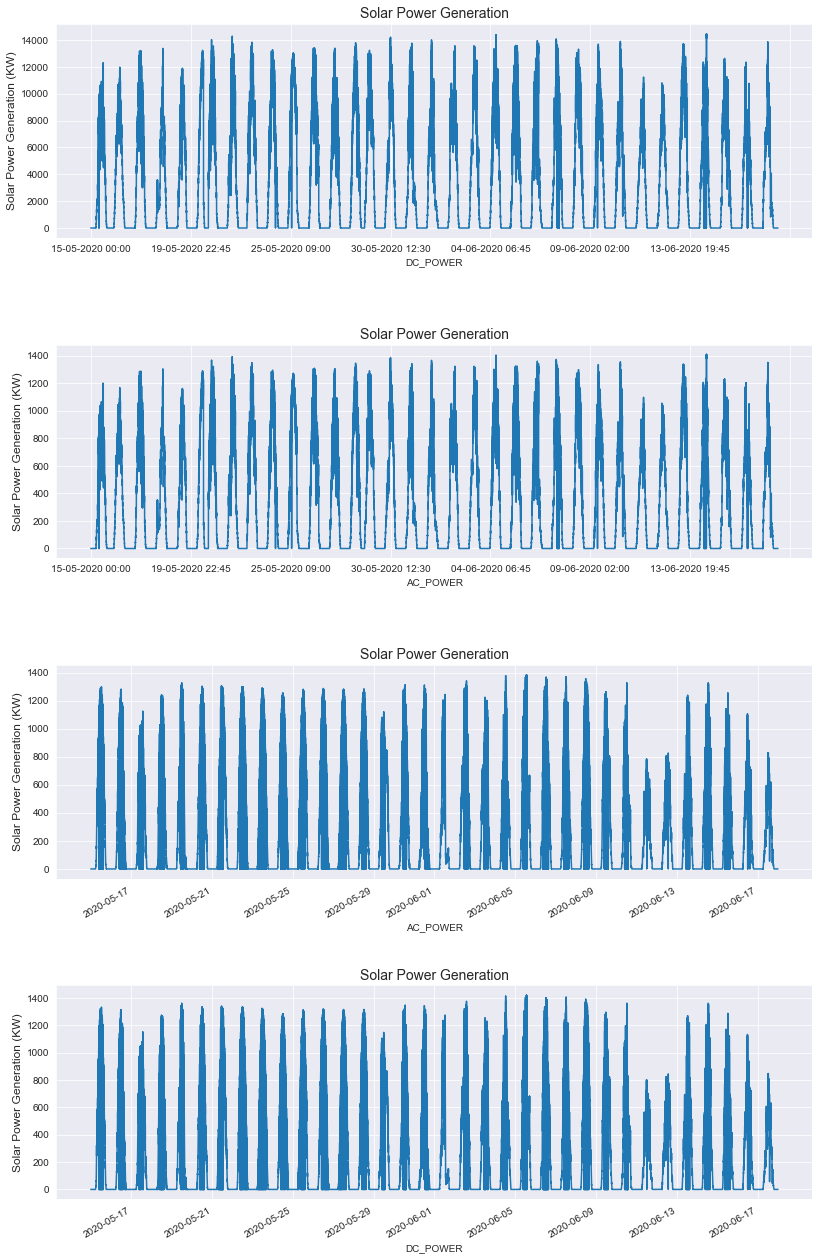

In [13]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=4, ncols=1, figsize=(15,24))
fig.subplots_adjust(left=0.2, hspace=0.5)
Plant_1.plot(x='DATE_TIME',y='DC_POWER', legend=False, ax = ax1)
ax1.set_title("Solar Power Generation",fontsize=14)
ax1.set_xlabel('DC_POWER')
ax1.set_ylabel("Solar Power Generation (KW)", fontsize=12)
Plant_1.plot(x='DATE_TIME',y='AC_POWER', legend=False, ax = ax2)
ax2.set_title("Solar Power Generation",fontsize=14)
ax2.set_xlabel('AC_POWER')
ax2.set_ylabel("Solar Power Generation (KW)", fontsize=12)
Plant_2.plot(x='DATE_TIME',y='AC_POWER', legend=False, ax = ax3)
ax3.set_title("Solar Power Generation",fontsize=14)
ax3.set_xlabel('AC_POWER')
ax3.set_ylabel("Solar Power Generation (KW)", fontsize=12)
Plant_2.plot(x='DATE_TIME',y='DC_POWER', legend=False, ax = ax4)
ax4.set_title("Solar Power Generation",fontsize=14)
ax4.set_xlabel('DC_POWER')
ax4.set_ylabel("Solar Power Generation (KW)", fontsize=12)
plt.show()

All power generated is mostely stable, but we have a drastic drop around 13.06.2020. May be due to some disturbances from solar winds or weather. 

### Search for missing data

With missingno we can search for missing data

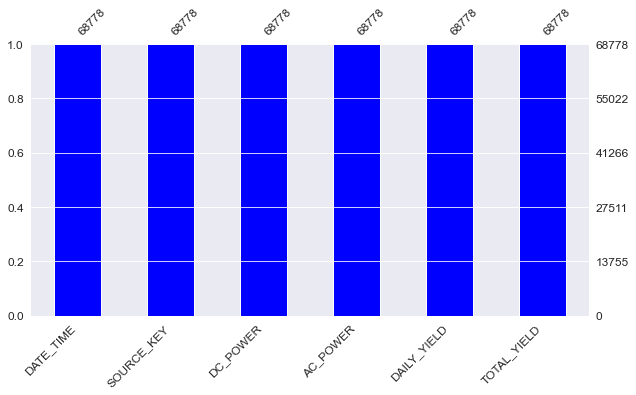

In [14]:
missingno.bar(Plant_1, color="blue", sort="ascending", figsize=(10,5), fontsize=12);

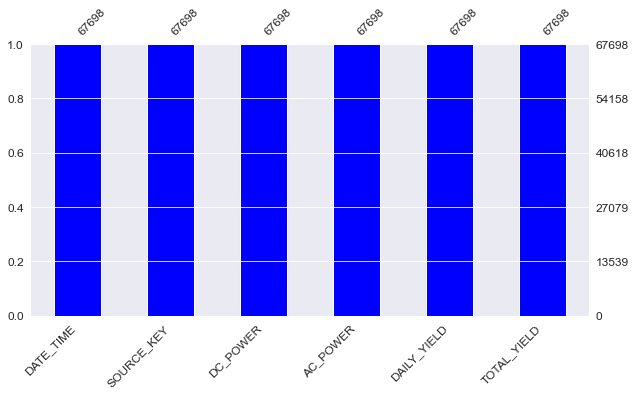

In [15]:
missingno.bar(Plant_2, color="blue", sort="ascending", figsize=(10,5), fontsize=12);

Here, there are no missing values in our data set. However, the data set needs to be further analysed and cleaned.

In [16]:
print(Plant_2.info(), Weat_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   SOURCE_KEY   67698 non-null  object        
 2   DC_POWER     67698 non-null  float64       
 3   AC_POWER     67698 non-null  float64       
 4   DAILY_YIELD  67698 non-null  float64       
 5   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3259 non-null   float64       
 2   MODULE_TEMPERATURE   3259 non-null   float64       
 3   IRRADIATION          3259 non-nul

We are interested in the type of data so we know how to manipulate the types for the ML models later. 

### Histogram Compare

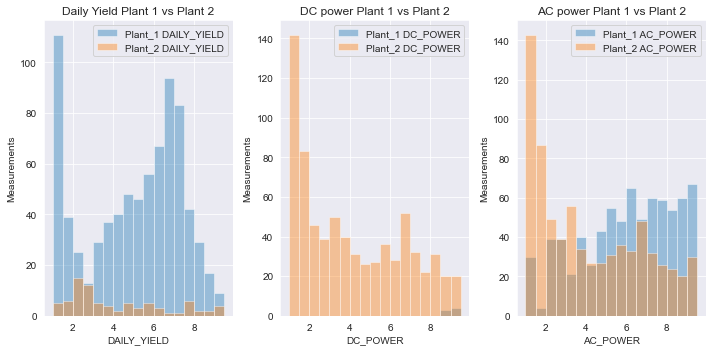

In [17]:
fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

ax0.hist(Plant_1.DAILY_YIELD, alpha=0.4, bins=np.arange(1, 10, 0.5))
ax0.hist(Plant_2.DAILY_YIELD, alpha=0.4, bins=np.arange(1, 10, 0.5))
ax0.legend(['Plant_1 DAILY_YIELD', 'Plant_2 DAILY_YIELD'])
ax0.set_title('Daily Yield Plant 1 vs Plant 2')
ax0.set_xlabel('DAILY_YIELD')
ax0.set_ylabel('Measurements')

ax1.hist(Plant_1.DC_POWER, alpha=0.4, bins=np.arange(1, 10, 0.5))
ax1.hist(Plant_2.DC_POWER, alpha=0.4, bins=np.arange(1, 10, 0.5))
ax1.legend(['Plant_1 DC_POWER', 'Plant_2 DC_POWER'])
ax1.set_title('DC power Plant 1 vs Plant 2')
ax1.set_xlabel('DC_POWER')
ax1.set_ylabel('Measurements')

ax2.hist(Plant_1.AC_POWER, alpha=0.4, bins=np.arange(1, 10, 0.5))
ax2.hist(Plant_2.AC_POWER, alpha=0.4, bins=np.arange(1, 10, 0.5))
ax2.legend(['Plant_1 AC_POWER', 'Plant_2 AC_POWER'])
ax2.set_title('AC power Plant 1 vs Plant 2')
ax2.set_xlabel('AC_POWER')
ax2.set_ylabel('Measurements')

fig.tight_layout()
plt.show()

### View of original data

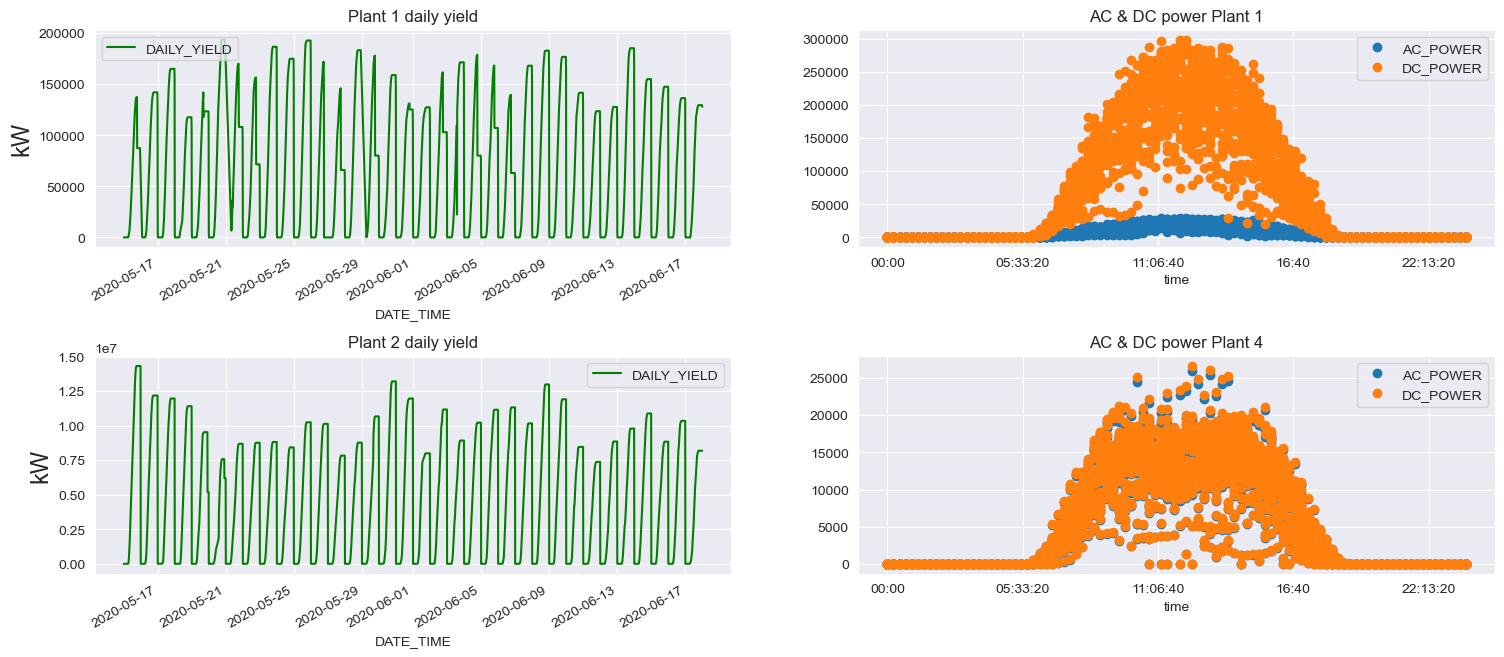

In [18]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, dpi=100, figsize=(20,8))
fig.subplots_adjust(left=0.2, hspace=0.5)
#Set dormat of the date we want
Plant_1['DATE_TIME']= pd.to_datetime(Plant_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
Plant_2['DATE_TIME']= pd.to_datetime(Plant_2['DATE_TIME'],format='%d-%m-%Y %H:%M')
#Sum unique index and reset index, add time
Plant_1_s=Plant_1.groupby('DATE_TIME').sum().reset_index() 
Plant_1_s['time'] = Plant_1_s['DATE_TIME'].dt.time
Plant_2_s=Plant_2.groupby('DATE_TIME').sum().reset_index() 
Plant_2_s['time'] = Plant_2_s['DATE_TIME'].dt.time
#Scatterplot of AC vs DC as well as Daily Yield for plant 1 and 2
Plant_1_s.plot(x='DATE_TIME',y='DAILY_YIELD',color='Green', ax=ax1)
ax1.set_title('Plant 1 daily yield',)
Plant_1_s.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax2)
ax2.set_title('AC & DC power Plant 1')
Plant_2_s.plot(x='DATE_TIME',y='DAILY_YIELD',color='Green', ax=ax3)
ax3.set_title('Plant 2 daily yield',)
Plant_2_s.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax4)
ax4.set_title('AC & DC power Plant 4')
ax1.set_ylabel('kW',fontsize=17)
ax3.set_ylabel('kW',fontsize=17)
plt.show()

In [19]:
Plant_1_s['AC_NEW'] = Plant_1_s['AC_POWER']
print(max(Plant_1_s.AC_NEW))
Plant_1_s['DC_NEW'] = Plant_1_s['DC_POWER']/10
print(max(Plant_1_s.DC_NEW))

29150.212499
29893.778571000003


The value above shows the the DC_POWER needs to be scaled down by a factor of 10 so it will fit to the maximum power generation from AC_POWER

### Scaled data

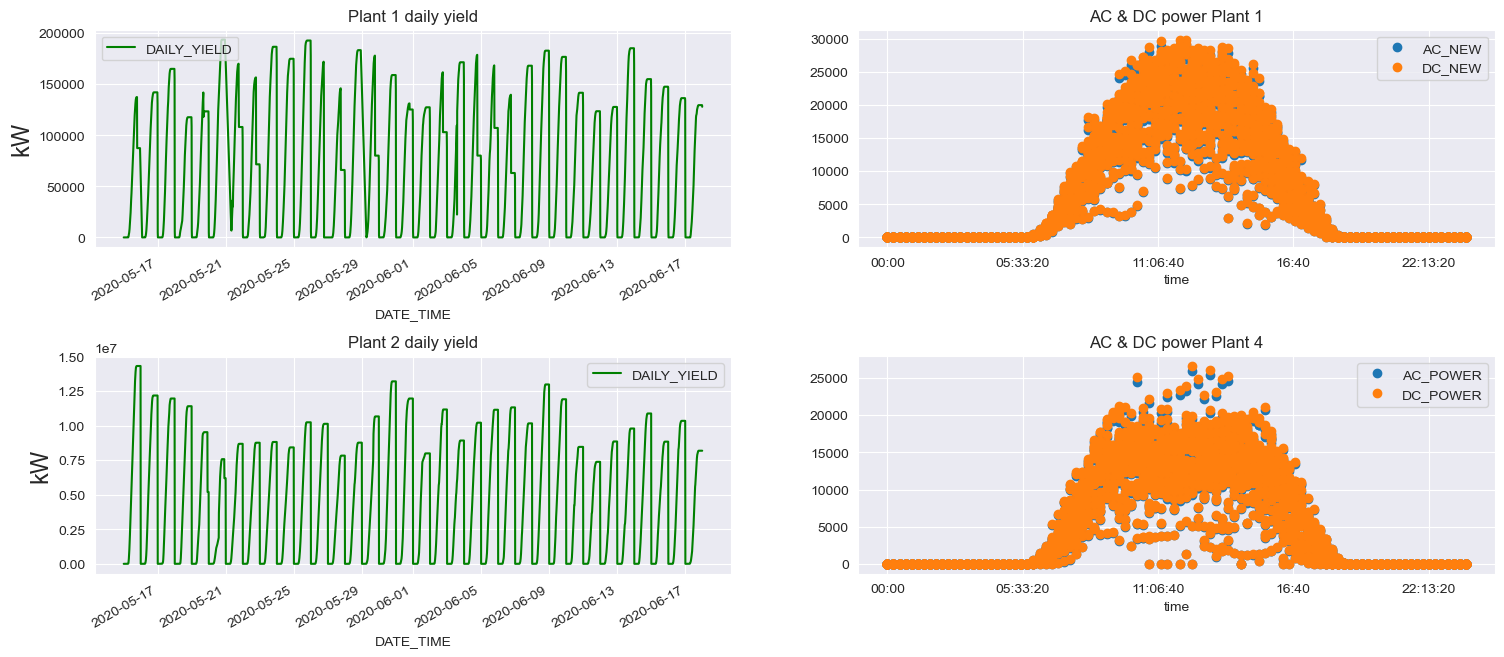

In [20]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, dpi=100, figsize=(20,8))
fig.subplots_adjust(left=0.2, hspace=0.5)
#Set dormat of the date we want
Plant_1['DATE_TIME']= pd.to_datetime(Plant_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
Plant_2['DATE_TIME']= pd.to_datetime(Plant_2['DATE_TIME'],format='%d-%m-%Y %H:%M')
Plant_1_s=Plant_1.groupby('DATE_TIME').sum().reset_index() 
Plant_1_s['time'] = Plant_1_s['DATE_TIME'].dt.time
Plant_2_s=Plant_2.groupby('DATE_TIME').sum().reset_index() 
Plant_2_s['time'] = Plant_2_s['DATE_TIME'].dt.time
Plant_1_s['AC_NEW'] = Plant_1_s['AC_POWER']
#max(Plant_1_s.AC_NEW)
Plant_1_s['DC_NEW'] = Plant_1_s['DC_POWER']/10
#Scatterplot of AC vs DC as well as Daily Yield for plant 1 and 2
Plant_1_s.plot(x='DATE_TIME',y='DAILY_YIELD',color='Green', ax=ax1)
ax1.set_title('Plant 1 daily yield',)
Plant_1_s.set_index('time').drop('DATE_TIME',1)[['AC_NEW','DC_NEW']].plot(style='o',ax=ax2)
ax2.set_title('AC & DC power Plant 1')
Plant_2_s.plot(x='DATE_TIME',y='DAILY_YIELD',color='Green', ax=ax3)
ax3.set_title('Plant 2 daily yield',)
Plant_2_s.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax4)
ax4.set_title('AC & DC power Plant 4')
ax1.set_ylabel('kW',fontsize=17)
ax3.set_ylabel('kW',fontsize=17)
plt.show()

Note that there is no power generated during the night. Something is off with the AC power in plant 1. We multiplied by the mean DC converted to AC for the model for plant 1 to fit. However, in the rest of the exercise, we will ignore DC and only focus on AC, since AC can be directly calculated from DC by multiplying by a dimensionless conversion factor.

### Merge Data

Note that the is no power generated during the night. Something is off with the DC power in plant 1. 

In [21]:
merged_dat1 = pd.merge(Weat_1, Plant_1, on='DATE_TIME')
merged_dat1.sample(10) 

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
53791,2020-06-10 21:00:00,22.296842,21.241884,0.000000,zVJPv84UY57bAof,0.000000,0.000000,6560.000000,7317016.000
55354,2020-06-11 15:00:00,28.410938,41.019122,0.524356,1BY6WEcLGh8j5v7,6869.857143,672.828571,4188.142857,6449169.143
29908,2020-05-30 11:30:00,26.040904,44.667008,0.561618,3PZuoBAID5Wc2HD,8148.750000,797.512500,2138.625000,7104327.625
37030,2020-06-02 20:45:00,23.400419,20.674728,0.000000,McdE0feGgRqW7Ca,0.000000,0.000000,7607.000000,7300359.000
55275,2020-06-11 14:00:00,28.226856,39.822217,0.463053,ZoEaEvLYb1n2sOq,6551.714286,641.728571,3609.428571,7299680.429
8278,2020-05-19 01:45:00,22.701711,20.725448,0.000000,iCRJl6heRkivqQ3,0.000000,0.000000,0.000000,7203767.000
67149,2020-06-17 05:00:00,22.350338,21.419505,0.000000,7JYdWkrLSPkdwr4,0.000000,0.000000,0.000000,7840965.000
63442,2020-06-15 10:45:00,27.778299,46.052281,0.860845,pkci93gMrogZuBj,9927.250000,969.712500,2676.375000,7399098.375
43879,2020-06-06 03:45:00,21.569016,19.236916,0.000000,rGa61gmuvPhdLxV,0.000000,0.000000,0.000000,7273090.000
15118,2020-05-22 23:15:00,21.641128,20.327665,0.000000,pkci93gMrogZuBj,0.000000,0.000000,0.000000,7225200.000


In [22]:
merged_dat2 = pd.merge(Weat_2, Plant_2, on='DATE_TIME')
merged_dat2.sample(10) 

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
24102,2020-05-28 00:30:00,26.656113,25.659902,0.000000,q49J1IKaHRwDQnt,0.000000,0.000000,0.000000,5.987918e+09
38466,2020-06-04 03:45:00,23.323460,21.813085,0.000000,LlT2YUhhzqhg5Sw,0.000000,0.000000,0.000000,9.354080e+09
39174,2020-06-04 11:45:00,31.101127,56.173838,0.959755,Qf4GUc1pJu5T6c6,1109.446667,1083.220000,220478.116190,9.395777e+09
28195,2020-05-30 06:30:00,24.369367,23.945122,0.017809,PeE6FRyGXUgsRhN,25.006667,24.153333,808.424762,6.849756e+09
62309,2020-06-15 10:45:00,30.405563,40.946115,0.412726,81aHJ1q11NBPMrL,641.193333,627.726667,156089.715714,1.465160e+10
44687,2020-06-07 02:30:00,23.664291,21.830670,0.000000,81aHJ1q11NBPMrL,0.000000,0.000000,0.000000,1.089013e+10
866,2020-05-15 09:45:00,31.375120,45.719524,0.799746,NgDl19wMapZy17u,1061.306667,1037.400000,166001.175238,1.822168e+07
65092,2020-06-16 18:15:00,27.565024,27.729070,0.017013,V94E5Ben1TlhnDV,24.086667,23.273333,470375.444286,1.530988e+10
32857,2020-06-01 11:30:00,30.963136,43.168146,0.352625,Mx2yZCDsyf6DPfv,542.442857,531.835714,237383.043333,8.047855e+09
6150,2020-05-17 22:00:00,26.507484,25.221006,0.000000,V94E5Ben1TlhnDV,0.000000,0.000000,544393.020916,1.737088e+09


In [23]:
merged_dat2.isnull().sum()

DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
dtype: int64

The code above shows that there are no missing values in any of the columns in the data.

#### Correlation and comparisons between plants

In [24]:
merged_dat1.corr()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
AMBIENT_TEMPERATURE,1.000000,0.855420,0.725278,0.724668,0.724903,0.478496,-0.036150
MODULE_TEMPERATURE,0.855420,1.000000,0.961511,0.954811,0.954924,0.198308,-0.015596
IRRADIATION,0.725278,0.961511,1.000000,0.989391,0.989340,0.078317,-0.005490
DC_POWER,0.724668,0.954811,0.989391,1.000000,0.999996,0.082243,0.003851
AC_POWER,0.724903,0.954924,0.989340,0.999996,1.000000,0.082193,0.003840
DAILY_YIELD,0.478496,0.198308,0.078317,0.082243,0.082193,1.000000,0.009896
TOTAL_YIELD,-0.036150,-0.015596,-0.005490,0.003851,0.003840,0.009896,1.000000


In [25]:
merged_dat2.corr()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
AMBIENT_TEMPERATURE,1.000000,0.848976,0.671998,0.563232,0.563324,0.505130,-0.312112
MODULE_TEMPERATURE,0.848976,1.000000,0.947057,0.749676,0.749604,0.206922,-0.181231
IRRADIATION,0.671998,0.947057,1.000000,0.780978,0.780851,0.023658,-0.107181
DC_POWER,0.563232,0.749676,0.780978,1.000000,0.999997,0.035737,-0.080903
AC_POWER,0.563324,0.749604,0.780851,0.999997,1.000000,0.035711,-0.080693
DAILY_YIELD,0.505130,0.206922,0.023658,0.035737,0.035711,1.000000,-0.051886
TOTAL_YIELD,-0.312112,-0.181231,-0.107181,-0.080903,-0.080693,-0.051886,1.000000


In the first plant, the generation dataset is closely correlated to the weather data while there seems to be a change in the second plant. This could be because the variance is significantly larger in the second dataset, and as we are going to see below that the samples are produced at a higher temperature in the second plant. So that might explain some of the differences in the plants.

### Ambient temperature in terms of samples produced

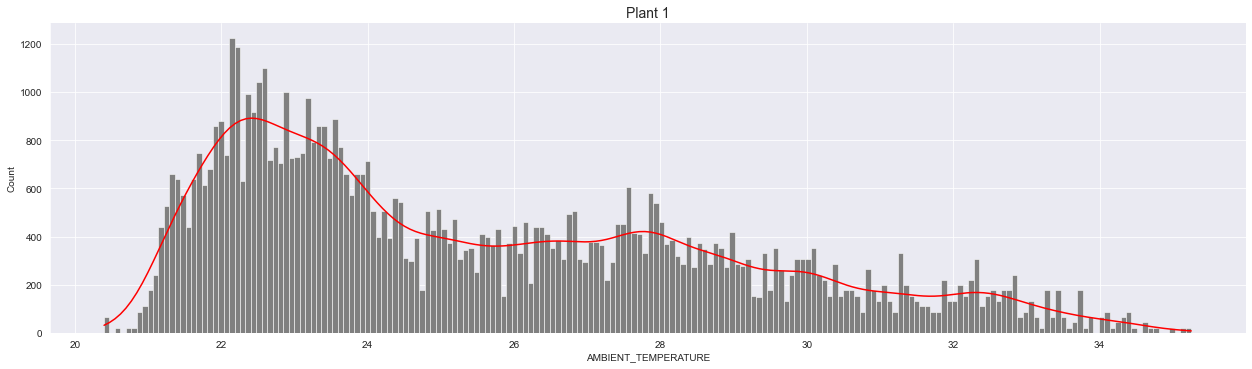

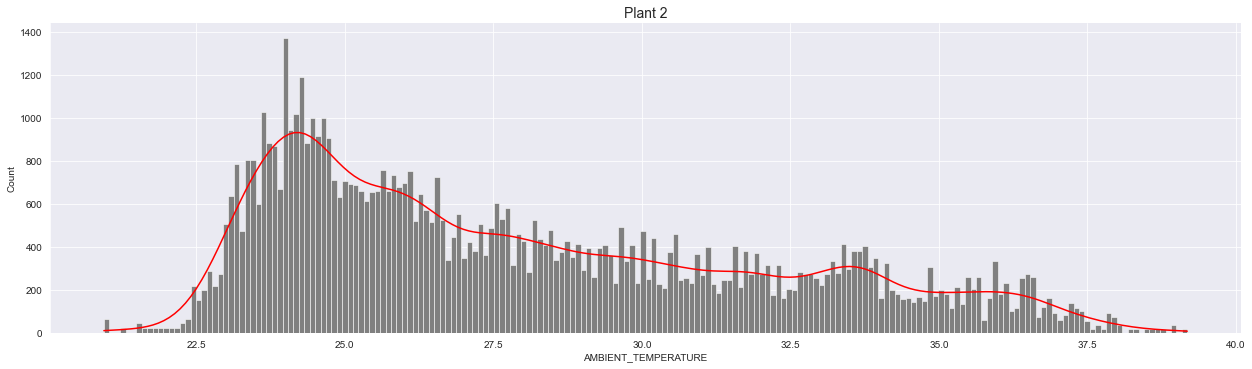

In [26]:
sns.displot(merged_dat1, x="AMBIENT_TEMPERATURE", color = "red", kde=True, 
            bins = 200, facecolor = "gray",height = 5, aspect = 3.5);
plt.title("Plant 1", fontsize=14)
sns.displot(merged_dat2, x="AMBIENT_TEMPERATURE",color = "red", kde=True, 
            bins = 200, facecolor = "gray",height = 5, aspect = 3.5);
plt.title("Plant 2", fontsize=14)
plt.show()

Here we see how many samples we have for the ambient temperature. Accordingly, power is produced at even higher temperatures in plant 2. Overall, the best result, meaning the most power produced is at temperatures ranging from 22-24 for both plants.

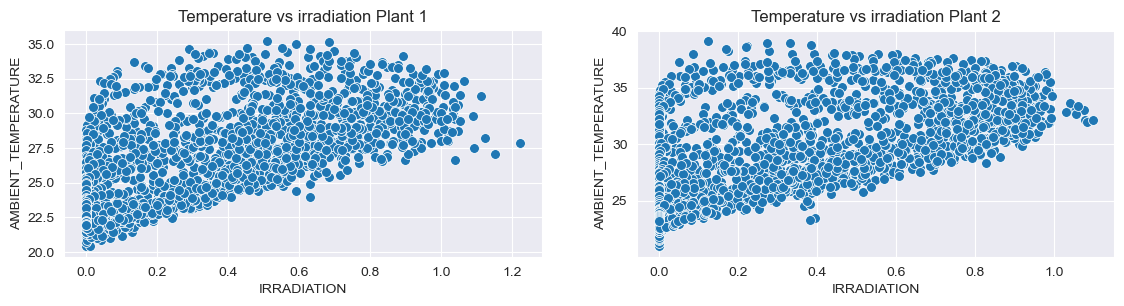

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(15,3))
fig.subplots_adjust(left=0.2, hspace=0.5)
sns.scatterplot(Weat_1.IRRADIATION, Weat_1.AMBIENT_TEMPERATURE, s=50, ax=ax1);
ax1.set_title('Temperature vs irradiation Plant 1')
sns.scatterplot(Weat_2.IRRADIATION, Weat_2.AMBIENT_TEMPERATURE, s=50, ax=ax2);
ax2.set_title('Temperature vs irradiation Plant 2')
plt.show()

Again, even higher temperatures for plant 2. Also even higher irradiation.

### Investigate the efficiency of AC-power
The efficiency is the ratio of total useful power and total input power. By investigating the efficiency we get a sense of how much power is produced. From the sun we receive high-frequency electromagnetic waves, which are further transformed into thermal energy in the solar panels. How much energy we can transform depends significantly on the frequency of the waves. Some waves with too high frequencies are transformed into heat before they get absorbed, and some will also be reflected before being transformed. Due to the geometry and material used in solar panels, we lose much of the potential transformed energy from the sun. 

In [28]:
#If look at the highest outcome of DC-power:
DC_pow=merged_dat1['DC_POWER']
AC_pow=merged_dat1['AC_POWER']
DC_pow2=merged_dat2['DC_POWER']
AC_pow2=merged_dat2['AC_POWER']
DC_max1 = max(DC_pow)
AC_max1 = max(AC_pow) 
DC_max2 = max(DC_pow2)
AC_max2 = max(AC_pow2)
print("Maximum DC-Power Plant 1= ",  DC_max1)
print("Maximum AC-Power Plant 1= ",  AC_max1)
print("Maximum DC-Power Plant 2= ",  DC_max2)
print("Maximum AC-Power Plant 2= ",  AC_max2)

Maximum DC-Power Plant 1=  14471.125
Maximum AC-Power Plant 1=  1410.95
Maximum DC-Power Plant 2=  1420.9333333333332
Maximum AC-Power Plant 2=  1385.42


In [29]:
#For min values we need to loop over all values larger than 0:
DC_min1 = min(i for i in DC_pow if i > 0)
AC_min1 = min(i for i in AC_pow if i > 0)
DC_min2 = min(i for i in DC_pow2 if i > 0)
AC_min2 = min(i for i in AC_pow2 if i > 0)
print("Minimum DC-Power Plant 1= ",  DC_min1)
print("Minimum AC-Power Plant 1= ",  AC_min1)
print("Minimum DC-Power Plant 2= ",  DC_min2)
print("Minimum AC-Power Plant 2= ",  AC_min2)

Minimum DC-Power Plant 1=  8.75
Minimum AC-Power Plant 1=  0.85
Minimum DC-Power Plant 2=  0.2857142857142857
Minimum AC-Power Plant 2=  0.2714285714285714


In [30]:
efficient_1 = (AC_max1/DC_max1)*100
efficient_2 = (AC_max2/DC_max2)*100
print("Efficiency in plant 1 in % = ", efficient_1) #(Dimensionless as AC and DC have same unit)
print("Efficiency in plant 2 in % = ", efficient_2)

Efficiency in plant 1 in % =  9.750105814164414
Efficiency in plant 2 in % =  97.50070376278505


In [31]:
print("efficient_1/efficient_2 = " , round(efficient_2/efficient_1))

efficient_1/efficient_2 =  10


There is a very low efficiency for plant 1. According to our findings, the efficiency in plant 2 is 97,5%, which is pretty good. Accordingly, the scaling factor is 10. There is something wrong with the power in plant 1. This needs to be recalculated, and therefore scaled by a factor of 10. 

In [32]:
Plant_1['DC_POWER'] =  Plant_1['DC_POWER']/10 #scaling the DC power

In [33]:
#We want to look at how much DC is converted to AC for each day
merged_dat1['day'] = merged_dat1['DATE_TIME'].dt.date #Get days
merged_dat1 = merged_dat1.groupby('day').sum()
merged_dat1['power_loss'] = merged_dat1['AC_POWER']/merged_dat1['DC_POWER'] * 100
#merged_dat1['power_loss']

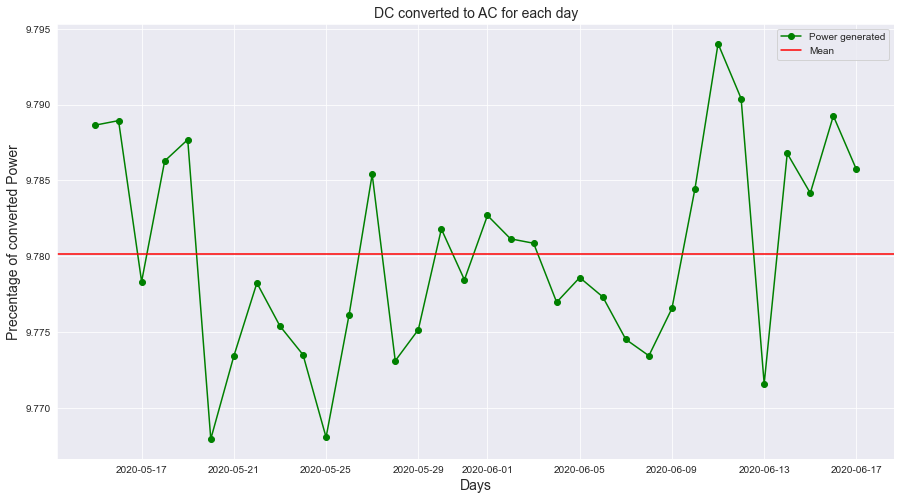

In [34]:
K=np.mean(merged_dat1['power_loss'])
merged_dat1['power_loss'].plot(style='-o', figsize=(15,8), label='Power generated', color='Green')
plt.axhline(y=K, color='r', label='Mean')
plt.title('DC converted to AC for each day', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Precentage of converted Power', fontsize=14)
plt.legend()
plt.show()

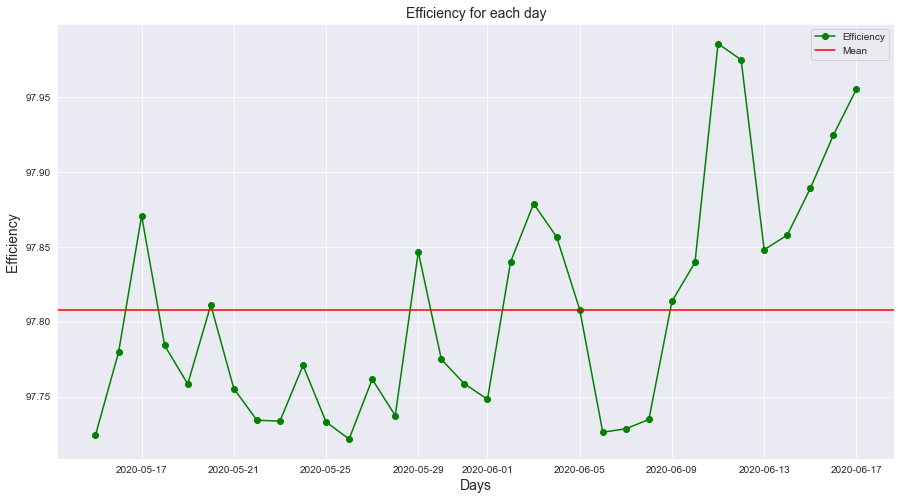

In [35]:
merged_dat2['day'] = merged_dat2['DATE_TIME'].dt.date #Get days
merged_dat2 = merged_dat2.groupby('day').sum()
merged_dat2['power_loss'] = merged_dat2['AC_POWER']/merged_dat2['DC_POWER'] * 100
J=np.mean(merged_dat2['power_loss'])
merged_dat2['power_loss'].plot(style='-o', figsize=(15,8), label='Efficiency', color='Green')
plt.axhline(y=J, color='r', label='Mean')
plt.title('Efficiency for each day', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Efficiency ', fontsize=14)
plt.legend()
plt.show() 

## Linear Regression for AC-Power for the first plant

In [36]:
Plant_1 #Check for sensors

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [37]:
sourcey=['1BY6WEcLGh8j5v7','1IF53ai7Xc0U56Y','3PZuoBAID5Wc2HD','7JYdWkrLSPkdwr4'] # Pick the first four sensors of plant 1 
tst=Plant_1[Plant_1.SOURCE_KEY==sourcey[0]]
tsst=tst.AC_POWER[tst.AC_POWER!=0] #Remove values of zero
tst=Plant_1[Plant_1.SOURCE_KEY==sourcey[1]]
tssst=tst.AC_POWER[tst.AC_POWER!=0]
tst=Plant_1[Plant_1.SOURCE_KEY==sourcey[2]]
tsssst=tst.AC_POWER[tst.AC_POWER!=0]
tst=Plant_1[Plant_1.SOURCE_KEY==sourcey[3]]
tssssst=tst.AC_POWER[tst.AC_POWER!=0]


Text(0, 0.5, 'AC_POWER')

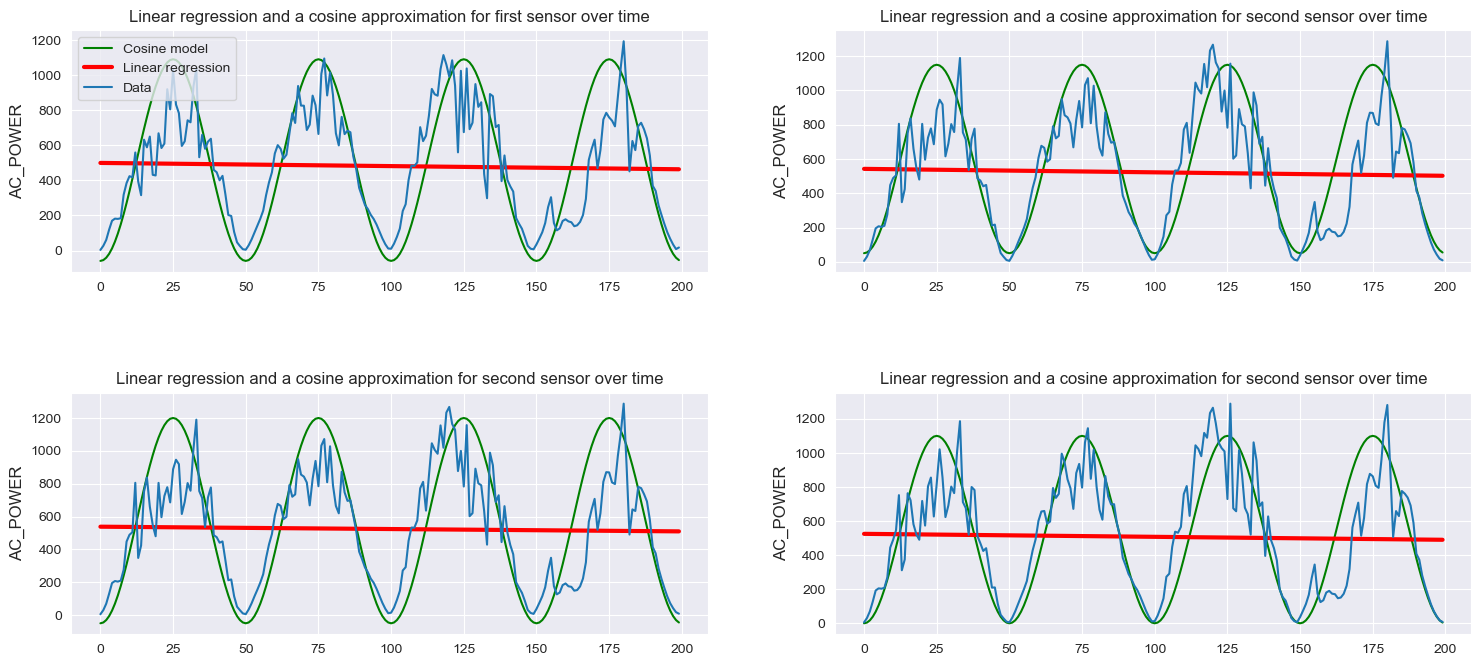

In [38]:
def cosfunc(x,a,b,c):
    return(a*np.cos(b*x)+c) #Make a cosine function to fit the data 
test_arr=[]
y_arr=[]
def lin_regi(y,n):
    '''Creates the linear regression and appends the parameters to test_arr'''
    global x_vec
    x_vec=np.arange(0,n,1).reshape(n,1) #Create a vector that defines the position of the DATE_TIME values 
    y_data=y[0:n]
    y_arr.append(y_data[0:n])
    lm=LinearRegression()
    lm.fit(x_vec,y_data)
    test_arr.append(lm.intercept_)
    test_arr.append(lm.coef_)
    return(test_arr,y_arr)

#Call the function
n=200
lin_regi(tsst,n)
lin_regi(tssst,n)
lin_regi(tsssst,n)
lin_regi(tssssst,n)

#Plot the data 
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, dpi=100, figsize=(20,8))
fig.subplots_adjust(left=0.2, hspace=0.5)
ax1.plot(x_vec,cosfunc(x_vec,a=-575 ,b=(2*np.pi)/50,c=516),color='green',label='Cosine model')
ax1.set_title('Linear regression and a cosine approximation for first sensor over time')
ax1.plot(x_vec,test_arr[0]+test_arr[1]*x_vec,color='red',linewidth=3,label='Linear regression')
ax1.plot(x_vec,tsst[0:n],label='Data')
ax1.legend(loc="upper left")
ax1.set_ylabel('AC_POWER',fontsize=12)

ax2.set_title('Linear regression and a cosine approximation for second sensor over time')
ax2.plot(x_vec,cosfunc(x_vec,a=-550 ,b=(2*np.pi)/50,c=600),color='green')
ax2.plot(x_vec,test_arr[2]+test_arr[3]*x_vec,color='red',linewidth=3)
ax2.plot(x_vec,tssst[0:n])
ax2.set_ylabel('AC_POWER',fontsize=12)

ax3.set_title('Linear regression and a cosine approximation for second sensor over time')
ax3.plot(x_vec,cosfunc(x_vec,a=-625 ,b=(2*np.pi)/50,c=575),color='green')
ax3.plot(x_vec,test_arr[4]+test_arr[5]*x_vec,color='red',linewidth=3)
ax3.plot(x_vec,tssst[0:n])
ax3.set_ylabel('AC_POWER',fontsize=12)

ax4.set_title('Linear regression and a cosine approximation for second sensor over time')
ax4.plot(x_vec,cosfunc(x_vec,a=-550 ,b=(2*np.pi)/50,c=550),color='green')
ax4.plot(x_vec,test_arr[6]+test_arr[7]*x_vec,color='red',linewidth=3)
ax4.plot(x_vec,tsssst[0:n])
ax4.set_ylabel('AC_POWER',fontsize=12)


## Estimating Error for models in plant 1

$R^2$ for the linear regression models

In [39]:
#Linear regression for first sensor
corr, _ = pearsonr(tsst[0:n], test_arr[0]+test_arr[1]*x_vec)
print('The R squared is: ', corr*corr)

#Linear regression for second sensor
corr, _ = pearsonr(tsst[0:n], test_arr[2]+test_arr[3]*x_vec)
print('The R squared is: ', corr*corr)

#Linear regression for third sensor
corr, _ = pearsonr(tsst[0:n], test_arr[4]+test_arr[5]*x_vec)
print('The R squared is: ', corr*corr)

#Linear regression for fourth sensor
corr, _ = pearsonr(tsst[0:n], test_arr[6]+test_arr[7]*x_vec)
print('The R squared is: ', corr*corr)



The R squared is:  [0.0011061452344267233]
The R squared is:  [0.001106145234426717]
The R squared is:  [0.0011061452344267252]
The R squared is:  [0.001106145234426729]


$R^2$ For cosine model

In [40]:
#Cosine model for first sensor
corr, _ = pearsonr(tsst[0:n], cosfunc(x_vec,a=-575 ,b=(2*np.pi)/50,c=516))
print('The R squared is: ', corr*corr)
#Cosine model for second sensor
corr, _ = pearsonr(tssst[0:n], cosfunc(x_vec,a=-550 ,b=(2*np.pi)/50,c=600))
print('The R squared is: ', corr*corr)
#Cosine model for third sensor
corr, _ = pearsonr(tsssst[0:n], cosfunc(x_vec,a=-625 ,b=(2*np.pi)/50,c=575))
print('The R squared is: ', corr*corr)
#Cosine model for Fourth sensor
corr, _ = pearsonr(tssssst[0:n], cosfunc(x_vec,a=-550 ,b=(2*np.pi)/50,c=550))
print('The R squared is: ', corr*corr)


The R squared is:  [0.731486194770235]
The R squared is:  [0.7152683963907058]
The R squared is:  [0.7157686172672202]
The R squared is:  [0.7214604449990432]


#### Calculate MSE

Looking at the MSE of the models with the highest $R^2$

In [41]:
#Mean Square Error for linear regression model
MSE=mean_squared_error(tsst[0:n],test_arr[0]+test_arr[1]*x_vec)
print('The Mean Square Error is: ', MSE)

#Mean Square Error for cosine model
MSE=mean_squared_error(tsst[0:n],cosfunc(x_vec,a=-575 ,b=(2*np.pi)/50,c=516))
print('The Mean Square Error is: ', MSE)

The Mean Square Error is:  99257.41031776868
The Mean Square Error is:  46622.34290871782


## Linear Regression for AC-Power for the second plant

In [42]:
Plant_2

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,0.000000,0.000000e+00
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,0.000000e+00
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,0.000000,0.000000e+00
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,0.000000,0.000000e+00
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,0.000000,0.000000e+00
...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,372436.317143,1.591271e+10
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,372436.317143,1.591309e+10
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,372436.317143,1.591346e+10
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,372436.317143,1.591383e+10


In [43]:
source_key=['4UPUqMRk7TRMgml','81aHJ1q11NBPMrL','9kRcWv60rDACzjR','Et9kgGMDl729KT4']
plnt2_sen=Plant_2[Plant_2.SOURCE_KEY==source_key[0]]
plnt2_sen1=plnt2_sen.AC_POWER[plnt2_sen.AC_POWER!=0]
plnt2_sen=Plant_2[Plant_2.SOURCE_KEY==source_key[1]]
plnt2_sen2=plnt2_sen.AC_POWER[plnt2_sen.AC_POWER!=0]
plnt2_sen=Plant_2[Plant_2.SOURCE_KEY==source_key[2]]
plnt2_sen3=plnt2_sen.AC_POWER[plnt2_sen.AC_POWER!=0]
plnt2_sen=Plant_2[Plant_2.SOURCE_KEY==source_key[3]]
plnt2_sen4=plnt2_sen.AC_POWER[plnt2_sen.AC_POWER!=0]

Text(0, 0.5, 'AC_POWER')

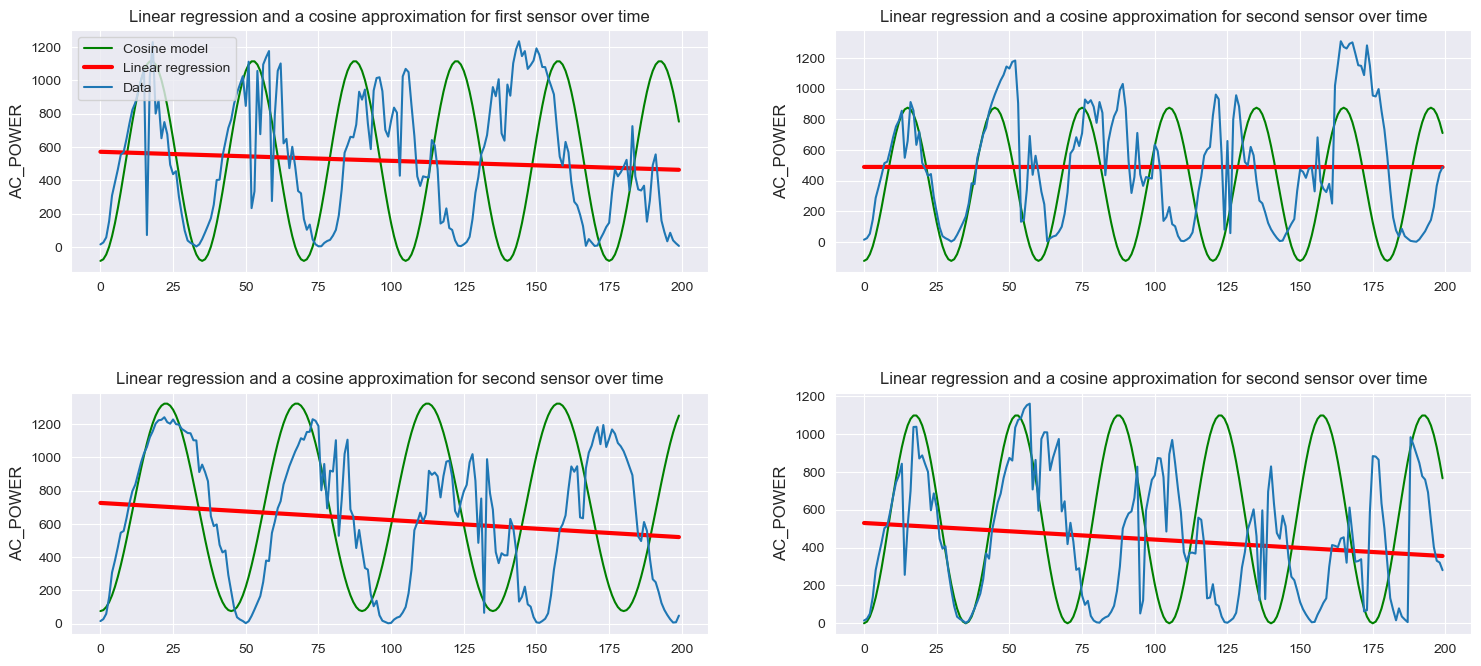

In [44]:

test_arr_2=[]
y_arr_2=[]
def lin_regin(y,n):
    '''Creates the linear regression and appends the parameters to test_arr'''
    global x_vec2
    x_vec2=np.arange(0,n,1).reshape(n,1) #Create a vector that defines the position of the DATE_TIME values 
    y_data2=y[0:n]
    y_arr.append(y_data2[0:n])
    lm=LinearRegression()
    lm.fit(x_vec,y_data2)
    test_arr_2.append(lm.intercept_)
    test_arr_2.append(lm.coef_)
    return(test_arr_2,y_arr_2)
n=200
lin_regin(plnt2_sen1,n)
lin_regin(plnt2_sen2,n)
lin_regin(plnt2_sen3,n)
lin_regin(plnt2_sen4,n)

#Plot the data 
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, dpi=100, figsize=(20,8))
fig.subplots_adjust(left=0.2, hspace=0.5)
ax1.plot(x_vec2,cosfunc(x_vec2,a=-600 ,b=(2*np.pi)/35,c=516),color='green',label='Cosine model')
ax1.set_title('Linear regression and a cosine approximation for first sensor over time')
ax1.plot(x_vec2,test_arr_2[0]+test_arr_2[1]*x_vec2,color='red',linewidth=3,label='Linear regression')
ax1.plot(x_vec2,plnt2_sen1[0:n],label='Data')
ax1.legend(loc="upper left")
ax1.set_ylabel('AC_POWER',fontsize=12)

ax2.set_title('Linear regression and a cosine approximation for second sensor over time')
ax2.plot(x_vec2,cosfunc(x_vec2,a=-500 ,b=(2*np.pi)/30,c=376),color='green')
ax2.plot(x_vec2,test_arr_2[2]+test_arr_2[3]*x_vec2,color='red',linewidth=3)
ax2.plot(x_vec2,plnt2_sen2[0:n])
ax2.set_ylabel('AC_POWER',fontsize=12)

ax3.set_title('Linear regression and a cosine approximation for second sensor over time')
ax3.plot(x_vec2,cosfunc(x_vec2,a=-625 ,b=(2*np.pi)/45,c=700),color='green')
ax3.plot(x_vec2,test_arr_2[4]+test_arr_2[5]*x_vec2,color='red',linewidth=3)
ax3.plot(x_vec2,plnt2_sen3[0:n])
ax3.set_ylabel('AC_POWER',fontsize=12)

ax4.set_title('Linear regression and a cosine approximation for second sensor over time')
ax4.plot(x_vec2,cosfunc(x_vec2,a=-550 ,b=(2*np.pi)/35,c=550),color='green')
ax4.plot(x_vec2,test_arr_2[6]+test_arr_2[7]*x_vec2,color='red',linewidth=3)
ax4.plot(x_vec2,plnt2_sen4[0:n])
ax4.set_ylabel('AC_POWER',fontsize=12)



## Estimating Error for models in plant 2

$R^2$ for the linear regression models

In [45]:
#Linear regression for first sensor
corr, _ = pearsonr(plnt2_sen1[0:n], test_arr_2[0]+test_arr_2[1]*x_vec2)
print('The R squared is: ', corr*corr)
#Linear regression for second sensor
corr, _ = pearsonr(plnt2_sen2[0:n], test_arr_2[2]+test_arr_2[3]*x_vec2)
print('The R squared is: ', corr*corr)
#Linear regression for third sensor
corr, _ = pearsonr(plnt2_sen3[0:n], test_arr_2[4]+test_arr_2[5]*x_vec2)
print('The R squared is: ', corr*corr)
#Linear regression for second sensor
corr, _ = pearsonr(plnt2_sen4[0:n], test_arr_2[6]+test_arr_2[7]*x_vec2)
print('The R squared is: ', corr*corr)

The R squared is:  [0.0070839579731153774]
The R squared is:  [4.216540612130557e-07]
The R squared is:  [0.02203355795770804]
The R squared is:  [0.024319632947597924]


$R^2$ for the cosine models

In [46]:
#Cosine model for first sensor
corr, _ = pearsonr(plnt2_sen1[0:n], cosfunc(x_vec2,a=-600 ,b=(2*np.pi)/35,c=516))
print('The R squared is: ', corr*corr)
#Cosine model for second sensor
corr, _ = pearsonr(plnt2_sen2[0:n], cosfunc(x_vec2,a=-500 ,b=(2*np.pi)/30,c=376))
print('The R squared is: ', corr*corr)
#Cosine model for third sensor
corr, _ = pearsonr(plnt2_sen3[0:n], cosfunc(x_vec2,a=-625 ,b=(2*np.pi)/45,c=700))
print('The R squared is: ', corr*corr)
#Cosine model for fourth sensor
corr, _ = pearsonr(plnt2_sen4[0:n], cosfunc(x_vec2,a=-550 ,b=(2*np.pi)/35,c=550))
print('The R squared is: ', corr*corr)


The R squared is:  [0.021989033289861227]
The R squared is:  [0.06625532424632312]
The R squared is:  [0.07065218131967455]
The R squared is:  [0.003798424343872204]


#### Calculate MSE

In [47]:
#Mean Square Error for linear regression model
MSE=mean_squared_error(plnt2_sen1[0:n],test_arr_2[0]+test_arr_2[1]*x_vec)
print('The Mean Square Error is: ', MSE)

#Mean Square Error for cosine model
MSE=mean_squared_error(plnt2_sen1[0:n],cosfunc(x_vec2,a=-600 ,b=(2*np.pi)/35,c=516))
print('The Mean Square Error is: ', MSE)

The Mean Square Error is:  137929.4297671348
The Mean Square Error is:  273702.05143181444


### Conclusion of models 

As the variance is lower in the generational dataset for the first plant, it makes the error smaller as the R^2 tells us how much the variance in the dataset is explained by our model. We have an R^2 at around 70% in the first plant for the cosine model vs around 2 % for the second plant, and even when we look at the data itself for the second plant the behavior is very unpredictable. The linear regression was also not a good approximation as the data has a waveform. 

## AR(1) Process

#### Correlation of data

The AR(1) process simulated is at the first sensor used for the first plant, trying to predict AC_Power. 

In [48]:
TEST=tsst #collect data 
values = pd.DataFrame(TEST.values) #extract values
dataframe = pd.concat([values.shift(1), values], axis=1)#shift values by 1
result = dataframe.corr() #Take the correlation to determine if samples are independent or not
print(result)

          0         0
0  1.000000  0.895528
0  0.895528  1.000000


#### Autocorrelation

Autocorrelation is a measure of correlation between the elements seperated by the index known as lag. And tells us how many lags our model should use, but we are going to use a lag of 1 as we are interested in doing an AR(1) process

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

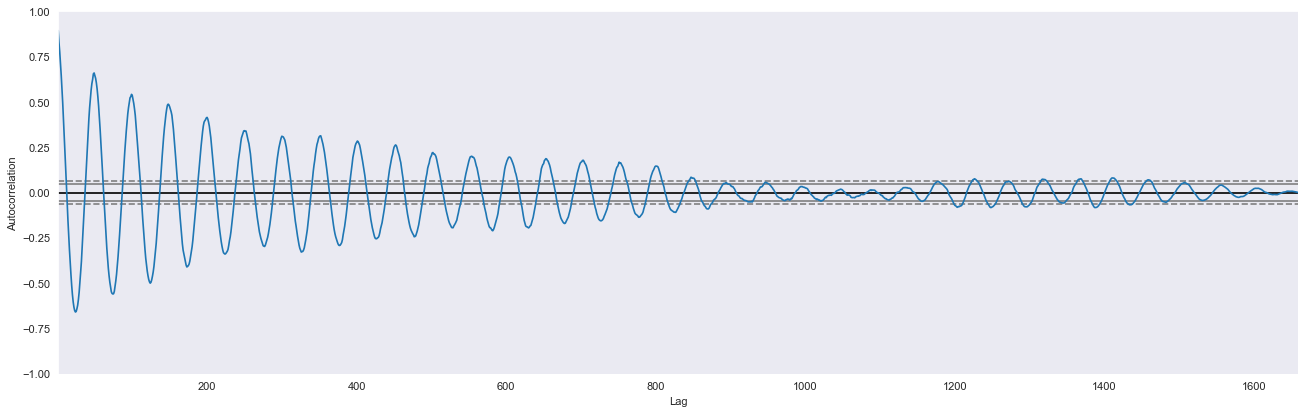

In [49]:
plt.figure(figsize=(20, 6), dpi=80)
autocorrelation_plot(TEST) #Plot the autocorrelation



Plot tells us that using anywhere from 1-200 lags is fine 

In [50]:
X = TEST.values #Collect the data for our model
train, test = X[1:len(X)-500], X[len(X)-500:] #Define training and test data
margin = 1 #lag index
AR_model = AutoReg(train, lags=1) #AR model of order 1
model_fit = AR_model.fit() 
coefficient = model_fit.params #Collect parameters
past = train[len(train)-margin:]
past = [past[i] for i in range(len(past))]
predictions = list()
for t in range(len(test)):
	size = len(past)
	lag = [past[i] for i in range(size-margin,size)]
	yhat = coefficient[0]
	for d in range(margin):
		yhat += coefficient[d+1] * lag[margin-d-1] #Calculate the predictions
	obs = test[t]
	predictions.append(yhat) #Append the predictions we make
	past.append(obs) #Collect the test data 
MSE=mean_squared_error(test,predictions)
print('The Mean Square Error is: ', MSE)

The Mean Square Error is:  19327.372382396945


#### Plots of AR(1) model

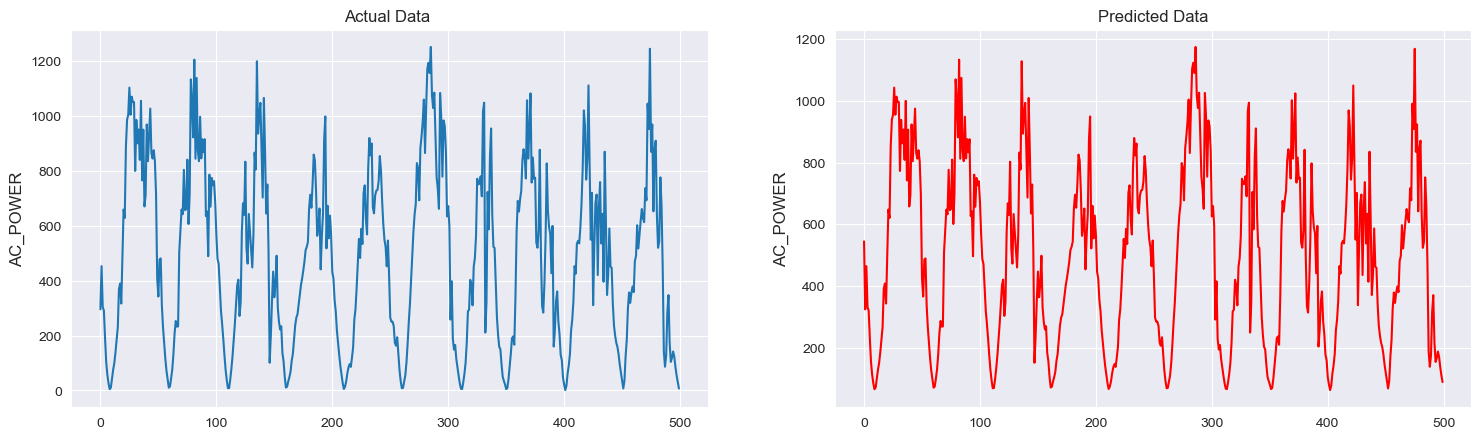

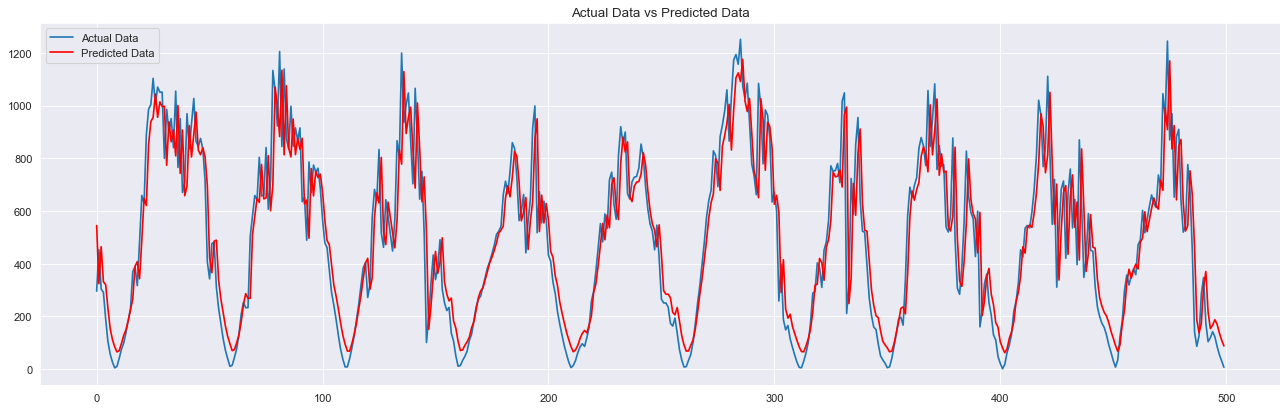

In [51]:
fig,(ax1, ax2) = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(20,5))
fig.subplots_adjust(left=0.2, hspace=0.5)
ax1.plot(test)
ax1.set_title('Actual Data ')
ax1.set_ylabel('AC_POWER',fontsize=12)
ax2.plot(predictions, color='red')
ax2.set_title('Predicted Data')
ax2.set_ylabel('AC_POWER',fontsize=12)
plt.show()
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(test,label='Actual Data')
plt.plot(predictions,color='red',label='Predicted Data')
plt.title('Actual Data vs Predicted Data')
plt.legend()

## Forecasting

We will predict the next two days of AC power generated by plant 2. Point to be noted that we can achieve similar results by predicting dc power generation rather than AC power. On the other hand, daily yield generated power is an excellent indicator of power prediction. When we make a model for forecasting purposes in time series analysis, we require a stationary time series for better prediction. So the first step to working on modeling is to make a time series stationary. Testing for stationarity is a frequently used activity in autoregressive modeling.

We will use the ARIMA model to forecast AC power data for future prediction. An autoregressive integrated moving average (ARIMA) model is used in statistics, econometrics, and time series analysis. This model is fitted to time series data to comprehend the data better or anticipate future points in the series, which we are saying is forecasting.

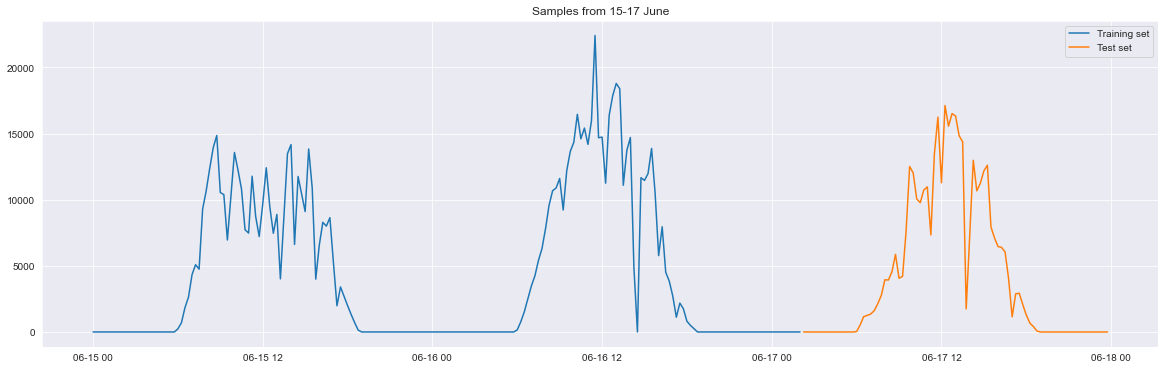

In [52]:
pred_gen2_AC_power=Plant_2.copy()

# grouping all the AC power data by date
pred_gen2_AC_power=pred_gen2_AC_power.groupby('DATE_TIME').sum()

# taking 3 days as sample size. Each day consists of 96 steps with 15 minute interval(24h/15m = 96). 3 days is equal to 3*96 = 288
sample_size = 288

# selecting sample from 15 june 00:00:00 to 18 june 00:00:00 (15-17 june data)
pred_gen2_AC_power=pred_gen2_AC_power['AC_POWER'][-sample_size:].reset_index()
pred_gen2_AC_power.set_index('DATE_TIME',inplace=True)
AC_pred_dataframe = pred_gen2_AC_power

# spliting training and test set by 70% training and 30% test. we didn't used random samples
AC_train, AC_test = train_test_split(AC_pred_dataframe, test_size=0.3,shuffle = False, stratify = None)

# plotting test and training data
plt.figure(figsize=(20,6))
plt.plot(AC_train,label='Training set')
plt.plot(AC_test,label='Test set')
plt.title('Samples from 15-17 June')
plt.legend()
plt.show()


A stationary time series is required to use the ARIMA model, which is one of the requirements. A series is said to be stationary when there is no change in its characteristics throughout time. There are several different approaches to determining whether or not a series is stationary. The Augmented Dickey-Fuller (ADF) test is the one we will utilize for this project. Now we are going to test for stationarity using the Augmented Dickey-Fuller unit root test.

If the ADF test's p-value is less than the significance level (0.05), then we will reject the null hypothesis and infer that the time series is stationary.

If the ADF test's p-value is greater than the significance level (0.05), then we fail to reject the null hypothesis and infer that the time series is not stationary.

In [53]:
adfTest = ADFTest(alpha=0.05)
adfTest.should_diff(AC_pred_dataframe)

(0.5111077370691159, True)

So, based on the result of the ADF test (0.5111077370691165 > 0.05), we can conclude that the data is non-stationary.

Now we are going to build our own ARIMA model to predict the data. We are using _auto\_arima_ model from _pmdarima.arima_ python package. We used _auto\_arima_ model because it automatically discovers the optimal order for an ARIMA model. We have tuned some of the parameters to make the model fit into our project. 

Explanation of parameters

d = As our data is not stationary we need to use a value greater than 0

p = The order of the Auto Regressive (AR) term. It specifies the number of Y delays to be utilized as predictors.

q = The Moving Average (MA) term's order. It indicates the number of forecast mistakes that should be incorporated into the ARIMA model.

D = The order of the seasonal differencing. This value can be none or a positive integer.

m = Since we are predicting for the next three days and we know that our observations are recorded at 15-minute intervals. Each day has 96 steps with 15-minute intervals (24h/15m = [96](https://www.google.com/search?q=24+hour+divided+by+15+minute&rlz=1C1GCEA_enNO1004NO1004&oq=24+hour+divided+by+15+minute&aqs=chrome..69i57j6.15023j0j15&sourceid=chrome&ie=UTF-8)). So for our case we are using value 96 in this parameter.

In [54]:
arima_model_1 = auto_arima(
    AC_train,
    start_p=0,
    d=1,
    start_q=0,
    max_p=4,
    max_d=4,
    max_q=4,
    start_P=0,
    D=1,
    start_Q=0,
    max_P=1,
    max_D=1,
    max_Q=1,
    m=96,
    seasonal=True,
    error_action="warn",
    trace=True,
    supress_warning=True,
    stepwise=True,
    random_state=11,
    n_fits=1,
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=1964.490, Time=1.39 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=inf, Time=19.70 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=inf, Time=31.65 sec
 ARIMA(0,1,0)(1,1,0)[96]             : AIC=57330018940978.859, Time=10.08 sec
 ARIMA(0,1,0)(0,1,1)[96]             : AIC=inf, Time=21.32 sec
 ARIMA(0,1,0)(1,1,1)[96]             : AIC=inf, Time=29.25 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=1956.400, Time=1.10 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=inf, Time=33.32 sec
 ARIMA(1,1,0)(1,1,1)[96]             : AIC=inf, Time=46.76 sec
 ARIMA(2,1,0)(0,1,0)[96]             : AIC=1952.142, Time=1.37 sec
 ARIMA(2,1,0)(1,1,0)[96]             : AIC=inf, Time=33.07 sec
 ARIMA(2,1,0)(0,1,1)[96]             : AIC=inf, Time=50.76 sec
 ARIMA(2,1,0)(1,1,1)[96]             : AIC=inf, Time=48.23 sec
 ARIMA(3,1,0)(0,1,0)[96]             : AIC=1954.150, Time=1.63 sec
 ARIMA(2,1,1)(0,1,0)[96]             : AIC=1

In [55]:
# the prediction data along with appropiate datetime will save in prediction dataframe
prediction = pd.DataFrame(arima_model_1.predict(n_periods=200), index=AC_test.index)
prediction.columns = ["AC_POWER_PRED"]

# Making future dates and 3 days as sample size. Each day consists of 96 steps with 15 minute interval(24h/15m = 96). 3 days is equal to 3*96 = 288. for the first value we will take the last date from AC_test
times = pd.date_range(AC_test.index[-1] + pd.Timedelta(minutes=15), periods=sample_size, freq='15min')
future_dates = []
for x in times:
    future_dates.append(pd.Timestamp(x))

future_prediction = pd.DataFrame(arima_model_1.predict(n_periods=sample_size),index=future_dates)
future_prediction.columns=['AC_POWER_PRED']

AC_test['PREDICTED_AC_POWER'] = prediction

Calculating r2 and Mean Squared Error

In [56]:
print("r2 score: ", r2_score(AC_test['AC_POWER'],AC_test['PREDICTED_AC_POWER']))
print("Mean squared error: ", mean_squared_error(AC_test['AC_POWER'],AC_test['PREDICTED_AC_POWER']))

r2 score:  0.5919415731042992
Mean squared error:  11783941.255357983


Plotting the data

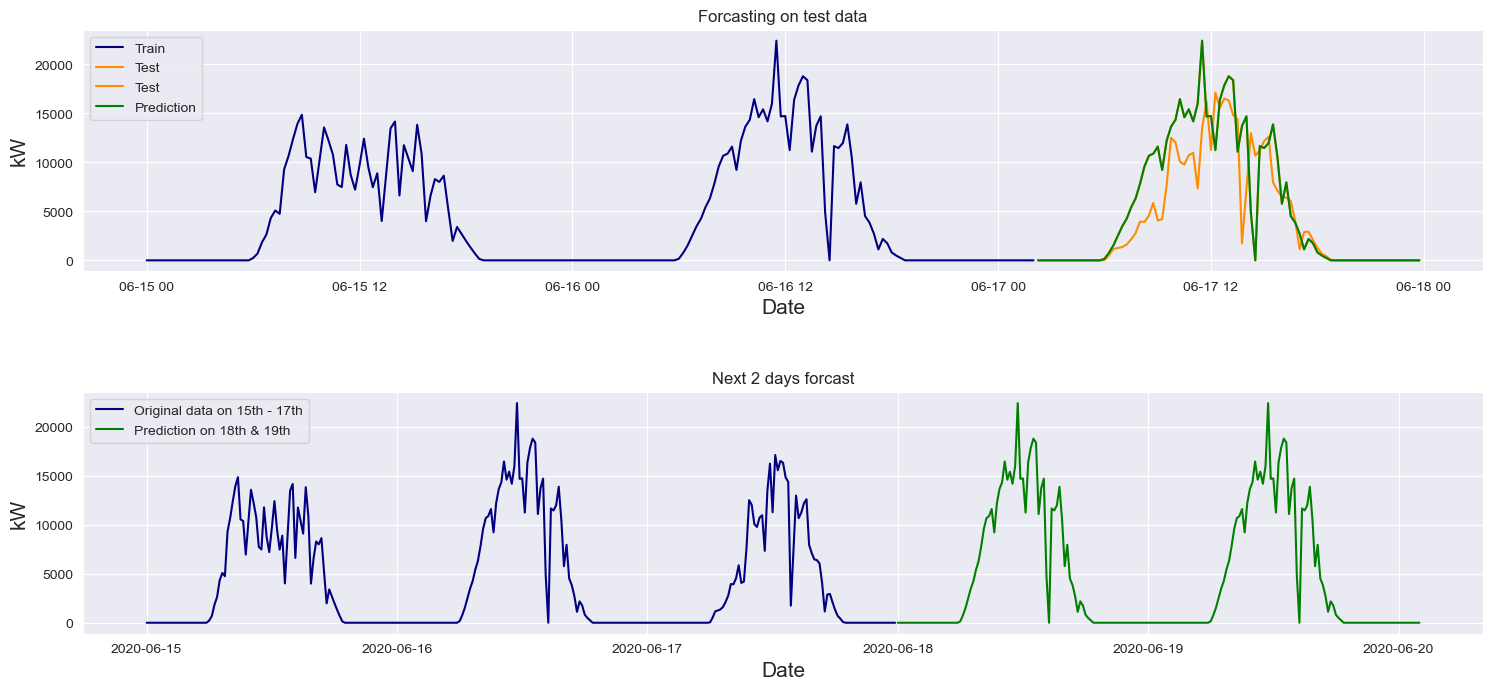

In [57]:
figure2,((axs1, axs2)) = plt.subplots(ncols=1, nrows=2, dpi=100, figsize=(20,8))
figure2.subplots_adjust(left=0.2, hspace=0.5)

axs1.set_title('Forcasting on test data')
axs1.plot(AC_train,label='Train',color='navy')
axs1.plot(AC_test,label='Test',color='darkorange')
axs1.plot(prediction,label='Prediction',color='green')
axs1.set_ylabel('kW', size=15)
axs1.set_xlabel('Date', size=15)
axs1.legend(loc="upper left")


axs2.set_title('Next 2 days forcast')
axs2.plot(pred_gen2_AC_power,label='Original data on 15th - 17th',color='navy')
axs2.plot(future_prediction,label='Prediction on 18th & 19th',color='green')
axs2.set_ylabel('kW', size=15)
axs2.set_xlabel('Date', size=15)
axs2.legend(loc="upper left")

## Conclusion

The data was cleaned, structured, scaled, and organized. Four machine learning models were developed for future prediction of power based on the data set provided, by the four processes. The AR1 process and the arima process have been selected for predicting future data because the MSE was low for the AR(1) prediction of plant 1. We employed an arima model for the second plant, as the data varied about four times as much as the first dataset, and we still got an $R^2$ of 59 percent. The cosine model was a unique idea to have an easy function to sample from and it worked quite well with the first dataset, but not so well with the second due to the variance in data. 

To answer the main research question, making a model to predict data for a solar power plant, is impossible to get perfect, the simple models that we have made are a decent approximation to sensors that could be faulty due to external factors like weather, maintenance, and that the data generally varies. 


### References
* Solanki, Sunny. “Missingno - Visualize Missing Values (Nans / Null Values) Distribution in Datasets [Python] by Sunny Solanki.” Developed for Developers by Developer for the Betterment of Development, CoderzColumn, 29 July 2022, https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python. 

*  Verma, Yugesh. “Complete Guide to Dickey-Fuller Test in Time-Series Analysis.” Analytics India Magazine, 6 Sept. 2021, https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/. 

* Time Series Forecasting Using Auto Arima in Python. https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd. 

* Dor. “Forecasting Time Series with Auto-Arima.” Data Science Portfolio, https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/. 

* “6. Tips to Using auto_arima.” 6. Tips to Using auto_arima - Pmdarima 2.0.1 Documentation, https://alkaline-ml.com/pmdarima/tips_and_tricks.html. 

* “PMDARIMA.ARIMA.AUTO_ARIMA.” Pmdarima.arima.auto_arima - Pmdarima 2.0.1 Documentation, https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html. 


* Prabhakaran, Selva. “Arima Model - Complete Guide to Time Series Forecasting in Python: ML+.” Machine Learning Plus, 3 Sept. 2022, https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/. 

* Singh, Deepika. “Deepika Singh.” Pluralsight, 4 June 2020, https://www.pluralsight.com/guides/advanced-time-series-modeling-(arima)-models-in-python. 

* Brownlee, Jason. “Autoregression Models for Time Series Forecasting with Python.” MachineLearningMastery.com, 6 Sept. 2021, https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/. 



